<a href="https://colab.research.google.com/github/hitomitsu50/SportsData_Portfolio/blob/main/%E9%87%8E%E7%90%83%E3%83%87%E3%83%BC%E3%82%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#モジュールのインポート
! pip install japanize_matplotlib
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 59.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=86e56a7e2b84990e1bae142e6a980c926073ad44a0573ebf9bbfdeca6550fb33
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib


In [2]:
#データの読み込み
df=pd.read_csv("sample_data/2022_Ohtani.csv")
df.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,...,1,2.46,-0.98,-0.98,33.1,NaN,NaN,NaN,NaN,NaN
1,1,ST,2022-09-29,84.3,-2.58,5.64,"Ohtani, Shohei",669127,660271,NaN,...,1,2.99,-1.47,-1.47,30.5,NaN,NaN,NaN,NaN,NaN
2,2,ST,2022-09-29,84.7,-3.19,5.48,"Ohtani, Shohei",669127,660271,NaN,...,1,2.62,-1.11,-1.11,24.7,NaN,NaN,NaN,NaN,NaN
3,3,ST,2022-09-29,84.7,-2.63,5.70,"Ohtani, Shohei",669127,660271,NaN,...,1,2.85,-0.94,-0.94,30.1,NaN,NaN,NaN,NaN,NaN
4,4,SL,2022-09-29,83.2,-1.96,6.26,"Ohtani, Shohei",669127,660271,NaN,...,1,3.38,-0.45,-0.45,43.4,NaN,NaN,NaN,NaN,NaN


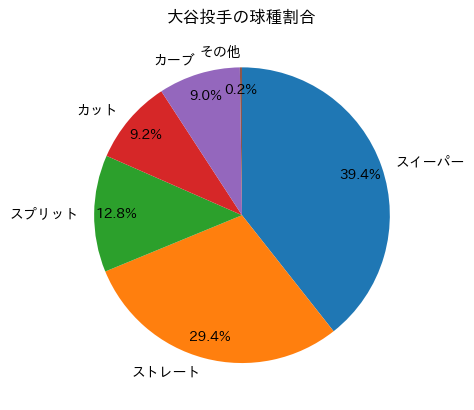

In [3]:
# 球種別のカウントを計算
counts = df["pitch_type"].value_counts()

# 合計を計算
total_counts = counts.sum()

# 各球種の割合を計算
percentages = counts / total_counts * 100

# 5%未満の球種を特定
other_pitches = percentages[percentages < 5]

# 5%未満の球種の合計カウントを計算
other_count = other_pitches.sum()

# 5%以上の球種と「その他」のカウントを含む新しいSeriesを作成
new_counts = counts[percentages >= 5].copy() # copy()を追加してSettingWithCopyWarningを防ぐ
if other_count > 0:
    new_counts['その他'] = other_count

# 球種名のマッピング
pitch_name_mapping = {
    'ST': 'スイーパー',
    'FF': 'ストレート',
    'FS': 'スプリット',
    'FC': 'カット',
    'CU': 'カーブ',
    'SI': 'シンカー',
    'SL': 'スライダー',
    'CS': 'チェンジアップ'
}

# 新しいcountsのインデックスをマッピングに基づいて変更し、マッピングされなかったものは元の名前を維持
new_labels = [pitch_name_mapping.get(label, label) for label in new_counts.index]


# 新しいcountsで円グラフを作成
plt.pie(new_counts, labels=new_labels, counterclock=False, startangle=90, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.1)

# タイトルの追加
plt.title("大谷投手の球種割合")
plt.show()

In [4]:
# pitch_type 列のユニークな値を表示
unique_pitch_types = df["pitch_type"].unique()
print("pitch_typeの種類:")
print(unique_pitch_types)

pitch_typeの種類:
['ST' 'SL' 'FC' 'FS' 'CU' 'SI' 'FF' 'CS']


In [5]:
#2025/10/15
#単位の変換
df["speed_km"]=df["release_speed"]*1.61
df.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,speed_km
0,0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,...,2.46,-0.98,-0.98,33.1,NaN,NaN,NaN,NaN,NaN,137.816
1,1,ST,2022-09-29,84.3,-2.58,5.64,"Ohtani, Shohei",669127,660271,NaN,...,2.99,-1.47,-1.47,30.5,NaN,NaN,NaN,NaN,NaN,135.723
2,2,ST,2022-09-29,84.7,-3.19,5.48,"Ohtani, Shohei",669127,660271,NaN,...,2.62,-1.11,-1.11,24.7,NaN,NaN,NaN,NaN,NaN,136.367
3,3,ST,2022-09-29,84.7,-2.63,5.70,"Ohtani, Shohei",669127,660271,NaN,...,2.85,-0.94,-0.94,30.1,NaN,NaN,NaN,NaN,NaN,136.367
4,4,SL,2022-09-29,83.2,-1.96,6.26,"Ohtani, Shohei",669127,660271,NaN,...,3.38,-0.45,-0.45,43.4,NaN,NaN,NaN,NaN,NaN,133.952


In [6]:
#球種ごとに分類
Fastball=df[df["pitch_type"]=="FF"]#ストレート
Cutter=df[df["pitch_type"]=="FC"]#カット
Sweeper=df[df["pitch_type"]=="ST"]#スイーパー
Curve=df[df["pitch_type"]=="CU"]#カーブ
Splitter=df[df["pitch_type"]=="FS"]#スプリット

In [7]:
#球種名と各平均球速をリストに格納
x=["ストレート","カット","スイーパー","カーブ","スプリット"]
y=[Fastball["speed_km"].mean(),Cutter["speed_km"].mean(),Sweeper["speed_km"].mean(),Curve["speed_km"].mean(),
   Splitter["speed_km"].mean()]

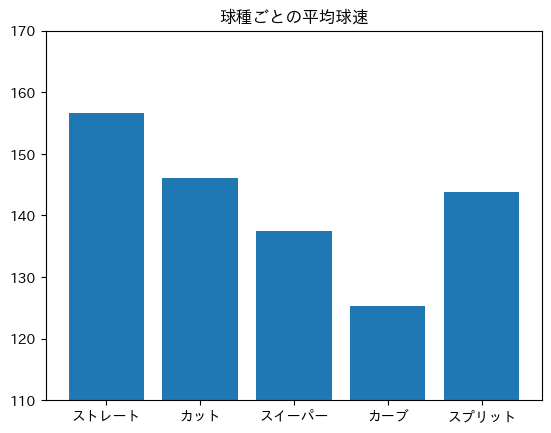

In [8]:
#棒グラフの作成
plt.bar(x,y)
plt.title("球種ごとの平均球速")
#y軸の幅を設定
plt.ylim(110,170)
plt.show()

In [9]:
#イニングごとの平均球速をリストに格納
x,y=[],[]
for i in range(1,10):
  inning=Fastball[Fastball["inning"]==i]
  x.append(i)
  y.append(inning["speed_km"].mean())
y

[np.float64(155.95601265822788),
 np.float64(156.48946456692912),
 np.float64(156.27350000000004),
 np.float64(156.79364367816092),
 np.float64(157.2165),
 np.float64(157.84931944444443),
 np.float64(156.4115),
 np.float64(156.975),
 nan]

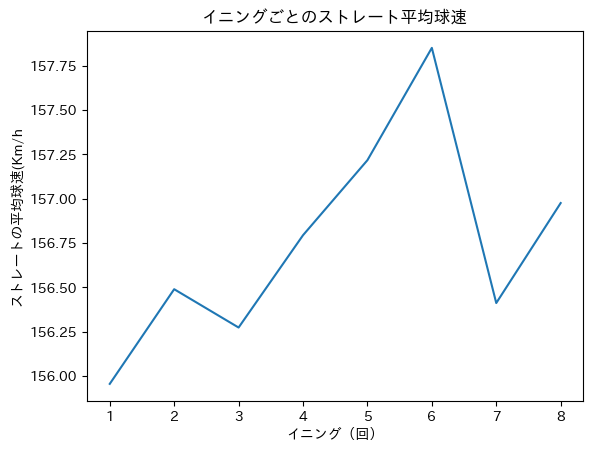

In [10]:
#折れ線グラフの作成
plt.plot(x,y)
plt.title("イニングごとのストレート平均球速")
#x軸とy軸にラベルを追加
plt.xlabel("イニング（回）")
plt.ylabel("ストレートの平均球速(Km/h")
plt.show()

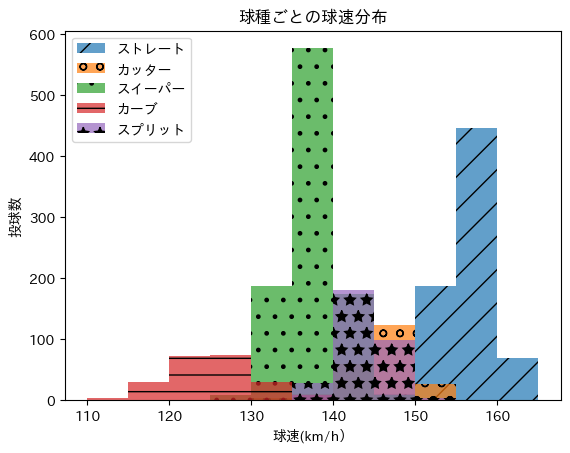

In [11]:
#棒の境界となる値をリストに格納
border=[110,115,120,125,130,135,140,145,150,155,160,165]

#ヒストグラムの作成
plt.hist(Fastball["speed_km"],alpha=0.7,hatch="/",label="ストレート",bins=border)
plt.hist(Cutter["speed_km"],alpha=0.7,hatch="o",label="カッター",bins=border)
plt.hist(Sweeper["speed_km"],alpha=0.7,hatch=".",label="スイーパー",bins=border)
plt.hist(Curve["speed_km"],alpha=0.7,hatch="-",label="カーブ",bins=border)
plt.hist(Splitter["speed_km"],alpha=0.7,hatch="*",label="スプリット",bins=border)
#見た目の調整
plt.title("球種ごとの球速分布")
plt.xlabel("球速(km/h）")
plt.ylabel("投球数")
plt.legend(loc="upper left")
plt.show()

In [12]:
#2025年10月16日
#単位変換
df["plate_x_cm"]=df["plate_x"]*30.48
df["plate_z_cm"]=df["plate_z"]*30.48
df.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,speed_km,plate_x_cm,plate_z_cm
0,0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,...,-0.98,33.1,NaN,NaN,NaN,NaN,NaN,137.816,10.6680,101.4984
1,1,ST,2022-09-29,84.3,-2.58,5.64,"Ohtani, Shohei",669127,660271,NaN,...,-1.47,30.5,NaN,NaN,NaN,NaN,NaN,135.723,9.7536,49.3776
2,2,ST,2022-09-29,84.7,-3.19,5.48,"Ohtani, Shohei",669127,660271,NaN,...,-1.11,24.7,NaN,NaN,NaN,NaN,NaN,136.367,57.6072,72.2376
3,3,ST,2022-09-29,84.7,-2.63,5.70,"Ohtani, Shohei",669127,660271,NaN,...,-0.94,30.1,NaN,NaN,NaN,NaN,NaN,136.367,-20.1168,73.4568
4,4,SL,2022-09-29,83.2,-1.96,6.26,"Ohtani, Shohei",669127,660271,NaN,...,-0.45,43.4,NaN,NaN,NaN,NaN,NaN,133.952,-25.2984,101.4984


In [13]:
# dfの列名を表示
print(df.columns)

Index(['Unnamed: 0', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events',
       ...
       'api_break_x_batter_in', 'arm_angle', 'attack_angle',
       'attack_direction', 'swing_path_tilt',
       'intercept_ball_minus_batter_pos_x_inches',
       'intercept_ball_minus_batter_pos_y_inches', 'speed_km', 'plate_x_cm',
       'plate_z_cm'],
      dtype='object', length=122)


In [14]:
#ストレートだけを取り出す
Fastball=df[df["pitch_type"]=="FF"]
Fastball.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,speed_km,plate_x_cm,plate_z_cm
49,489,FF,2022-09-29,95.4,-2.21,6.01,"Ohtani, Shohei",664913,660271,NaN,...,-0.56,37.2,NaN,NaN,NaN,NaN,NaN,153.594,2.7432,163.6776
94,1848,FF,2022-09-29,97.6,-2.18,6.02,"Ohtani, Shohei",669221,660271,NaN,...,0.41,37.5,NaN,NaN,NaN,NaN,NaN,157.136,-0.6096,131.6736
105,2745,FF,2022-09-29,93.7,-2.01,6.01,"Ohtani, Shohei",643393,660271,NaN,...,-0.67,40.4,NaN,NaN,NaN,NaN,NaN,150.857,-1.5240,42.6720
106,2837,FF,2022-09-29,94.1,-2.14,6.03,"Ohtani, Shohei",643393,660271,NaN,...,-0.53,41.2,NaN,NaN,NaN,NaN,NaN,151.501,-32.9184,113.3856
114,66,FF,2022-09-23,98.3,-2.25,5.84,"Ohtani, Shohei",595909,660271,single,...,-0.55,38.7,NaN,NaN,NaN,NaN,NaN,158.263,-2.1336,57.3024


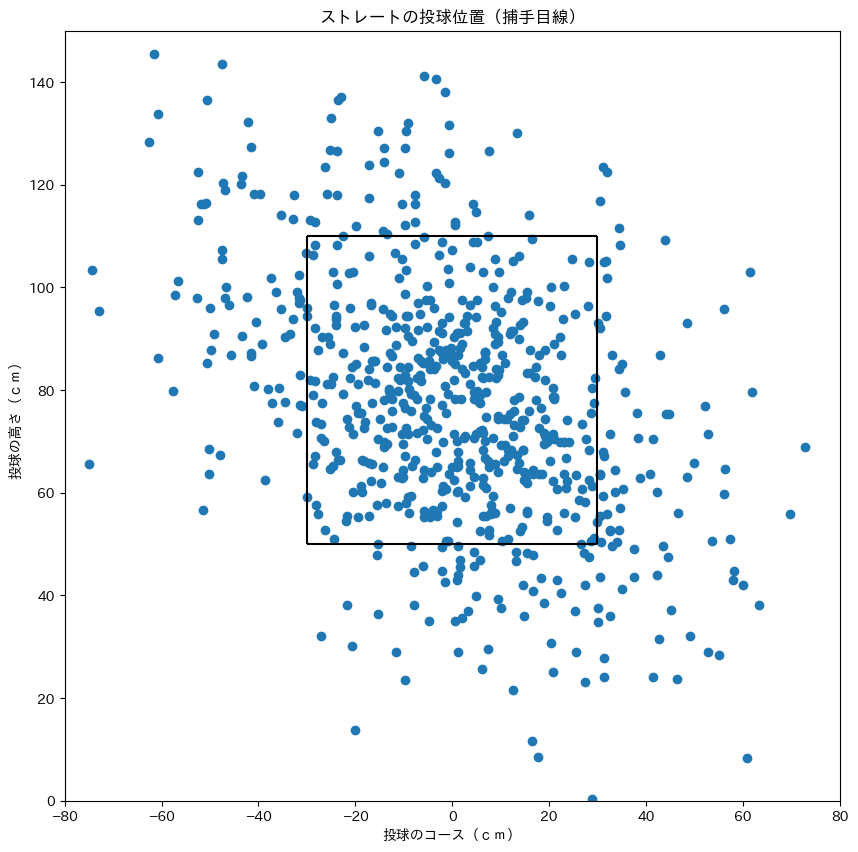

In [15]:
#2025年10月16日
#散布図の作成
plt.figure(figsize=(10,10))
plt.scatter(Fastball["plate_x_cm"],Fastball["plate_z_cm"])
#見た目の調整
plt.title("ストレートの投球位置（捕手目線）")
plt.xlabel("投球のコース（ｃｍ）")
plt.ylabel("投球の高さ（ｃｍ）")
plt.xlim(-80,80)
plt.ylim(0,150)
plt.hlines(y=[50,110],xmin=-30,xmax=30,color="black")
plt.vlines(x=[-30,30],ymin=50,ymax=110,color="black")
plt.show()

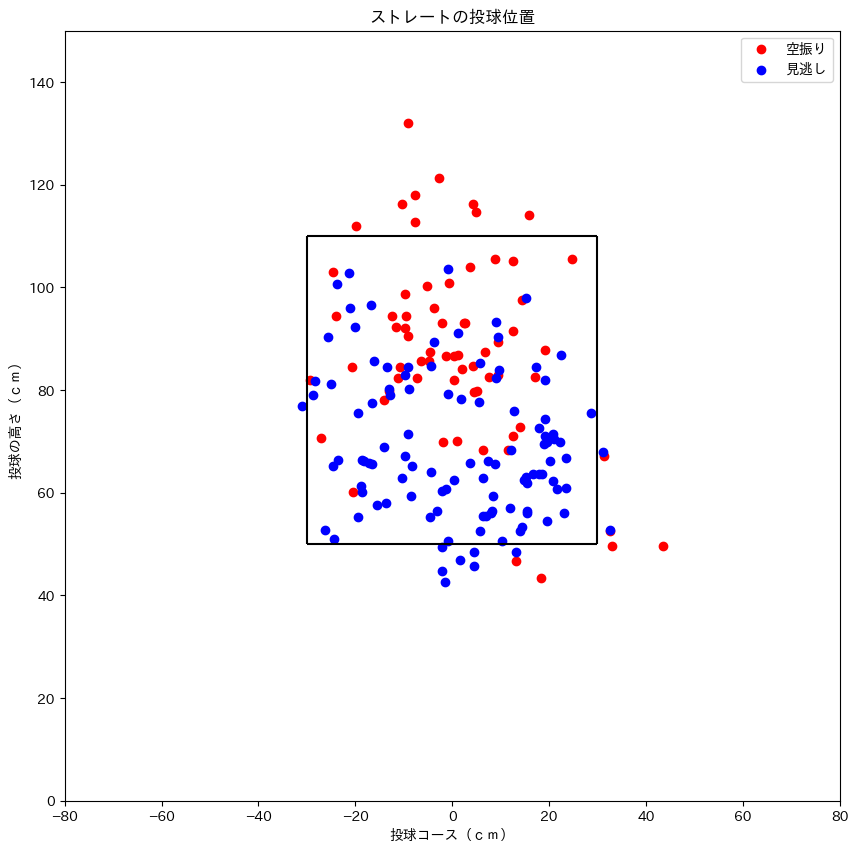

In [16]:
#空振りストライクと見逃しストライクを抽出
Swinging=Fastball[Fastball["description"].isin(["swinging_strike","swinging_strike_blocked"])]
Called=Fastball[Fastball["description"]=="called_strike"]
#色分けした散布図の作成
plt.figure(figsize=(10,10))
plt.scatter(Swinging["plate_x_cm"],Swinging["plate_z_cm"],color="red",label="空振り")
plt.scatter(Called["plate_x_cm"],Called["plate_z_cm"],color="blue",label="見逃し")
#見た目の調整
plt.title("ストレートの投球位置")
plt.xlabel("投球コース（ｃｍ）")
plt.ylabel("投球の高さ（ｃｍ）")
plt.legend(loc="upper right")
plt.hlines(y=[50,110],xmin=-30,xmax=30,color="black")
plt.vlines(x=[-30,30],ymin=50,ymax=110,color="black")
plt.xlim(-80,80)
plt.ylim(0,150)
plt.show()

In [17]:
#2025年10月17日
#ストレートのみを抽出
Fastball=df[df["pitch_type"]=="FF"]
#コース別に集計するためのリスト
location=[[0,0,0],[0,0,0],[0,0,0]]
#合計球数をカウントするための変数
total=0
for height,side in zip(Fastball["plate_z_cm"],Fastball["plate_x_cm"]):
  #上下位置や左右位置がストライクゾーン外の場合は処理をスキップ
  if height<50 or 110<height:
    continue
  if side<-30 or 30<side:
    continue
  #上下位置の判定
  if 90 <= height <= 110:
    h = 0
  elif 70 <= height < 90 :
    h = 1
  elif 50 <= height < 70 :
    h = 2
  #左右位置の判定
  if -30 <= side < -10:
    s = 0
  elif -10 <= side <= 10:
    s = 1
  elif 10 < side <= 30:
    s = 2

  #集計用リストに判定されたコース１を加算
  location[h][s] += 1
  #ストライクゾーン内の合計数をカウントする変数に１を加算
  total += 1

In [18]:
#2025年10月18日
import numpy as np
#コース別の投球割合を格納するリスト
ratio_list=[]
#各コースの投球割合を算出してratioに格納
for lst in location:
  add=[num/total for num in lst]
  ratio_list.append(add)

ratio = np.array(ratio_list)

print("Calculated ratio:", ratio)
ratio

Calculated ratio: [[0.06651885 0.10864745 0.05321508]
 [0.12416851 0.20842572 0.10199557]
 [0.08203991 0.13303769 0.12195122]]


array([[0.06651885, 0.10864745, 0.05321508],
       [0.12416851, 0.20842572, 0.10199557],
       [0.08203991, 0.13303769, 0.12195122]])

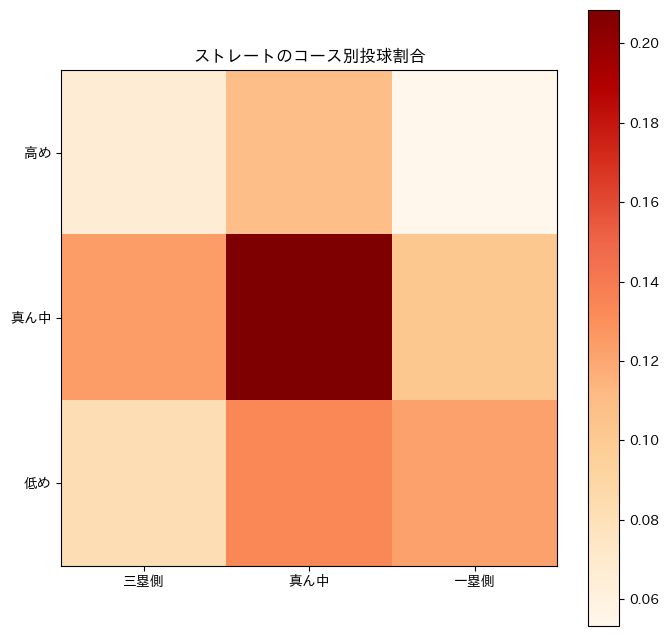

In [19]:
#ヒートマップの作成
plt.figure(figsize=(8,8))
plt.imshow(ratio,cmap="OrRd")

#見た目の調整
plt.colorbar()
plt.title("ストレートのコース別投球割合")
plt.xticks([0,1,2],["三塁側","真ん中","一塁側"])
plt.yticks([0,1,2],["高め","真ん中","低め"])
plt.show()

In [20]:
#関数として定義する
def create_heatmap(data,title):
  #コース別に集計するためのリスト作成
  location=[[0,0,0],[0,0,0],[0,0,0]]
  total=0

  for height,side in zip(data["plate_z_cm"], data["plate_x_cm"]):
    #高さやコースがストライクゾーン外の場合は処理をスキップ
    if height<50 or 110<height:
      continue
    if side<-30 or 30<side:
      continue

    #高さの分類
    if 90 <= height <= 110:
      h=0
    elif 70 <= height < 90:
      h=1
    elif 50 <= height < 70:
      h=2
    #コースの分類
    if -30 <= side < -10:
      s=0
    elif -10 <= side <= 10:
      s=1
    elif 10 < side <= 30:
      s=2
    location[h][s] += 1
    total += 1
  #コース別の投球割合を計算
  ratio=[]
  for lst in location:
    add=[]
    for num in lst:
      if total > 0: # totalが0でないことを確認
        add.append(num/total)
      else:
        add.append(0) # totalが0の場合は0を追加
    ratio.append(add)

  #ヒートマップの作成
  plt.figure(figsize=(8,8))
  plt.imshow(ratio,cmap="OrRd")

  #見た目の調整
  plt.colorbar()
  plt.clim(0,0.2)
  plt.title(title)
  plt.xticks([0,1,2],["三塁側","真ん中","一塁側"])
  plt.yticks([0,1,2],["高め","真ん中","低め"])
  plt.show()

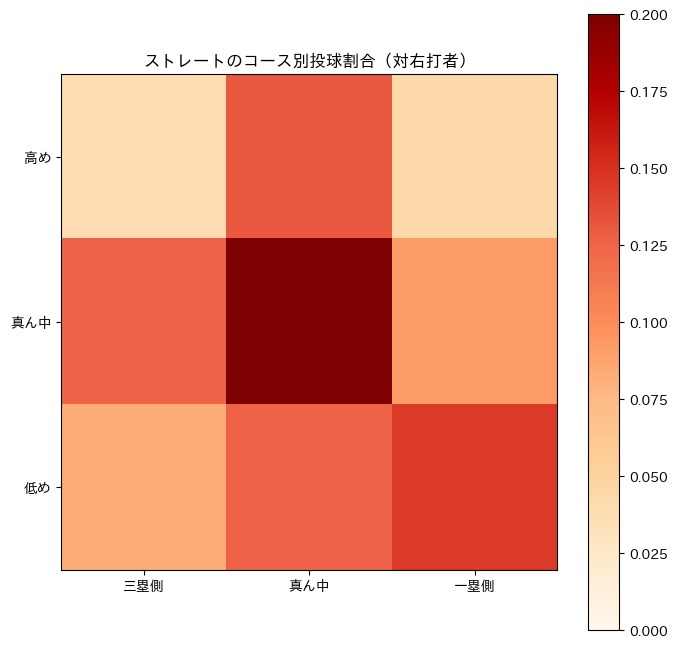

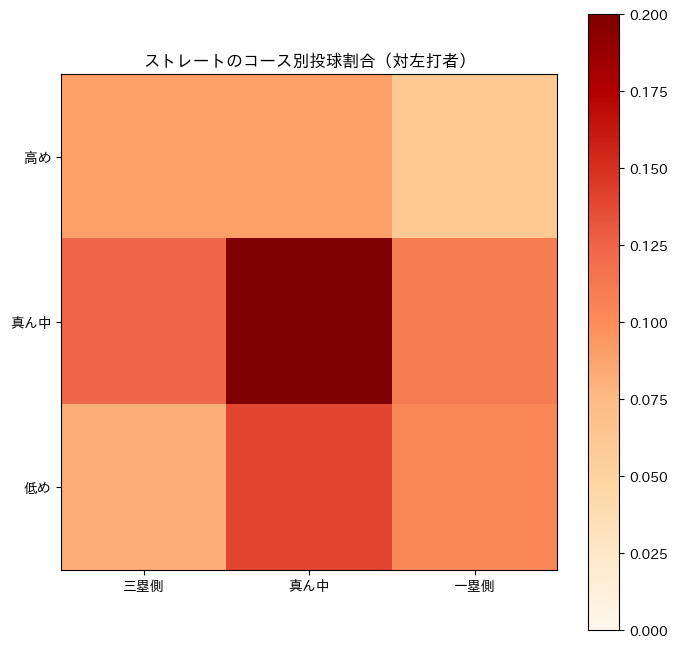

In [21]:
#ストレートのデータを対右打者と対左打者に分ける
Fastball_Right=Fastball[Fastball["stand"]=="R"]
Fastball_Left=Fastball[Fastball["stand"]=="L"]
#作成した関数を使ってヒートマップの作成
create_heatmap(Fastball_Right,"ストレートのコース別投球割合（対右打者）")
create_heatmap(Fastball_Left,"ストレートのコース別投球割合（対左打者）")

In [23]:
#2025年10月19日
#リリースポイントを表す箱ひげ図
#単位変換
df["release_pos_x_cm"]=df["release_pos_x"]*30.48
df["release_pos_z_cm"]=df["release_pos_z"]*30.48
df.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,speed_km,plate_x_cm,plate_z_cm,release_pos_x_cm,release_pos_z_cm
0,0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,...,NaN,NaN,NaN,NaN,NaN,137.816,10.6680,101.4984,-76.8096,175.2600
1,1,ST,2022-09-29,84.3,-2.58,5.64,"Ohtani, Shohei",669127,660271,NaN,...,NaN,NaN,NaN,NaN,NaN,135.723,9.7536,49.3776,-78.6384,171.9072
2,2,ST,2022-09-29,84.7,-3.19,5.48,"Ohtani, Shohei",669127,660271,NaN,...,NaN,NaN,NaN,NaN,NaN,136.367,57.6072,72.2376,-97.2312,167.0304
3,3,ST,2022-09-29,84.7,-2.63,5.70,"Ohtani, Shohei",669127,660271,NaN,...,NaN,NaN,NaN,NaN,NaN,136.367,-20.1168,73.4568,-80.1624,173.7360
4,4,SL,2022-09-29,83.2,-1.96,6.26,"Ohtani, Shohei",669127,660271,NaN,...,NaN,NaN,NaN,NaN,NaN,133.952,-25.2984,101.4984,-59.7408,190.8048


In [25]:
#球種別にデータを抽出
Fastball=df[df["pitch_type"]=="FF"]
Sweeper=df[df["pitch_type"]=="ST"]
Splitter=df[df["pitch_type"]=="FS"]
Curve=df[df["pitch_type"]=="CU"]

/tmp/ipython-input-2187170406.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([Fastball["release_pos_z_cm"],Sweeper["release_pos_z_cm"],Splitter["release_pos_z_cm"],Curve["release_pos_z_cm"]],


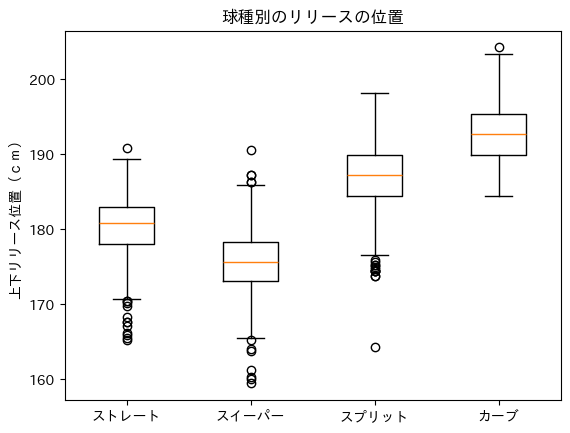

In [27]:
#箱ひげ図を描画
plt.boxplot([Fastball["release_pos_z_cm"],Sweeper["release_pos_z_cm"],Splitter["release_pos_z_cm"],Curve["release_pos_z_cm"]],
            labels=["ストレート","スイーパー","スプリット","カーブ"])
plt.ylabel("上下リリース位置（ｃｍ）")
plt.title("球種別のリリースの位置")
plt.show()

/tmp/ipython-input-3224111368.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([Fastball["release_pos_x_cm"],Sweeper["release_pos_x_cm"],Splitter["release_pos_x_cm"],Curve["release_pos_x_cm"]],


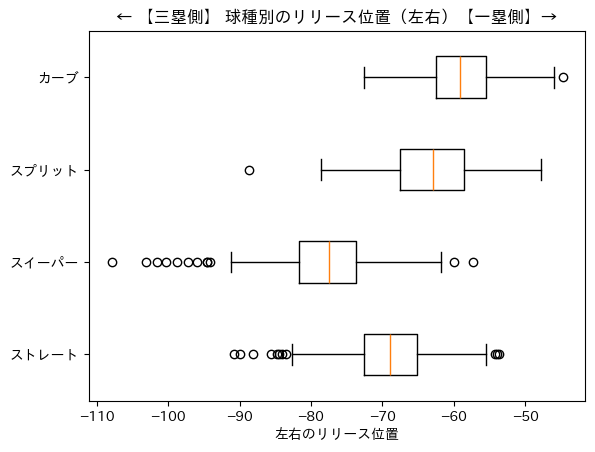

In [34]:
#横向き箱ひげ図を作成
plt.boxplot([Fastball["release_pos_x_cm"],Sweeper["release_pos_x_cm"],Splitter["release_pos_x_cm"],Curve["release_pos_x_cm"]],
            labels=["ストレート","スイーパー","スプリット","カーブ"],vert=False)
plt.xlabel("左右のリリース位置")
plt.title("← 【三塁側】 球種別のリリース位置（左右）【一塁側】→")

plt.show()